Interesting generalisations/future directions:
1. d-dimensions
2. Shapes other than square
3. Calculation of entropy, etc. other thermodynamic potentials


This notebook shows the plots of $m$, $C_v$, $U$, $\xi$ for $k=J=1$, $N=30$ spins on both sides of the lattice (900 spins), and the monte carlo parameters equilibriation time, autocorrelation time and number of monte carlo samples for each temperature: $T_{eq}=10^{3}, T_{auto} = 10^{2}, n = 100$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import energy

In [15]:
import os 
import thermodynamics as td
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
temp = np.arange(0.1,5.1, step = dt)
mag = [] # Ensemble-Averaged Magnetisation at each temperature
susc = [] # (ensemble averaged)magnetic susceptibility at each temperature
Energies = [] # Ensemble-Averaged Energy at each temperature
spec_heat = [] # ensemble averaged specific heat at each temperature. 

below_Tc = 2. # If you get good results, try 2.2
above_Tc = 2.4 # If you get good results, try 2.3

mag_below = []
E_below = []
mag_above = []
E_above = []

N=30
fn = "snapshots\\N=30\\"  # You will have to do this calculation for N = [5,10,20,30]

# Calc response functions from this stored data
### PART 3 DISTRIBUTION OF M vS E ###

# For plotting m - T transition
for t in temp:
    path = fn + "temp=" + str(round(t,1)) + "\\"
    m=0
    E=0
    mags_list =[]
    E_list = []
    for i in range(1,100):
        fname = path + "n="+str(round(float(i),1))+".csv"
        lattice = np.loadtxt(fname)
        lattice_mag = td.magnetisation(lattice)
        lattice_E = energy.hamilton(lattice, J=1)
        m += lattice_mag
        E += lattice_E
        mags_list.append(lattice_mag)
        E_list.append(lattice_E)
        if round(t,1) == below_Tc :
            mag_below.append(lattice_mag)
            E_below.append(lattice_E)
        elif round(t,1) == above_Tc :
            mag_above.append(lattice_mag)
            E_above.append(lattice_E)

    m /= 100
    E /= 100
    
    susc.append(td.mag_susc(np.array(mags_list),n=(N**2),T=t))
    spec_heat.append(td.spec_heat_stat(np.array(E_list),T=t))
    mag.append(m)
    Energies.append(E)
    print("Done for t=",t)


  

Done for t= 0.1
Done for t= 0.2
Done for t= 0.30000000000000004
Done for t= 0.4
Done for t= 0.5
Done for t= 0.6
Done for t= 0.7000000000000001
Done for t= 0.8
Done for t= 0.9
Done for t= 1.0
Done for t= 1.1
Done for t= 1.2000000000000002
Done for t= 1.3000000000000003
Done for t= 1.4000000000000001
Done for t= 1.5000000000000002
Done for t= 1.6
Done for t= 1.7000000000000002
Done for t= 1.8000000000000003
Done for t= 1.9000000000000001
Done for t= 2.0
Done for t= 2.1
Done for t= 2.2
Done for t= 2.3000000000000003
Done for t= 2.4000000000000004
Done for t= 2.5000000000000004
Done for t= 2.6
Done for t= 2.7
Done for t= 2.8000000000000003
Done for t= 2.9000000000000004
Done for t= 3.0000000000000004
Done for t= 3.1
Done for t= 3.2
Done for t= 3.3000000000000003
Done for t= 3.4000000000000004
Done for t= 3.5000000000000004
Done for t= 3.6
Done for t= 3.7
Done for t= 3.8000000000000003
Done for t= 3.9000000000000004
Done for t= 4.0
Done for t= 4.1
Done for t= 4.2
Done for t= 4.3
Done for t=

## Filtering outliers and finding $T_c$

In [17]:

# Filtering the outliers - they are all within (0,1)
# There are three outliers

# We read the magnetisation data to find out the outliers:
test = np.abs(np.array(mag))
abs_mag = np.abs(np.array(mag))
collect = []
for i in range(1,11): # all outliers within 0,1
    if test[i] < test[i-1] and test[i+1] > test[i]:
        collect.append(i)
    if susc[i] > susc[i-1] and susc[i+1] < susc[i]:
        collect.append(i)
    if spec_heat[i] > spec_heat[i-1] and spec_heat[i+1] < spec_heat[i]:
        collect.append(i)
for i in collect:
    if test[i] < test[i-1] and test[i+1] > test[i]:
        mag[i] = (abs_mag[i+1] + abs_mag[i-1])/2
        Energies[i] = (Energies[i+1] + Energies[i-1])/2
    if susc[i] > susc[i-1] and susc[i+1] < susc[i]:
        susc[i] = (susc[i+1] + susc[i-1])/2
    if spec_heat[i] > spec_heat[i-1] and spec_heat[i+1] < spec_heat[i]:
        spec_heat[i] = (spec_heat[i+1] + spec_heat[i-1])/2

spec_heat_dt, ftemp , Tc = td.spec_heat_diff(energies=Energies, temp=temp)
Tc_index = Tc/dt
print("Transition temperature: ",Tc)



Transition temperature:  2.1


## Plots of magnetisation, susceptibility, specific heat and internal energy

In [20]:


def plot_stuff():

    plt.scatter(temp, np.array(mag)) # We need more divisions of temperature. to record the fall of magnetisation more finely
    plt.title("Magnetisations")
    plt.show()

    plt.plot(temp, np.abs(np.array(mag)))
    plt.title("Magnetisation - Absolute")
    plt.show()
    # This drops off too soon. This is perhaps because of small size
    # Tasks - produce larger sizes.

    plt.plot(temp, np.array(Energies))
    plt.title("Internal Energy")
    plt.show()

    plt.plot(temp,np.array(susc))
    plt.title("Mag. Susceptibility")
    plt.show()

    plt.plot(temp,spec_heat,label='stat')
    plt.legend()
    plt.title('Specific Heat')
    plt.show()



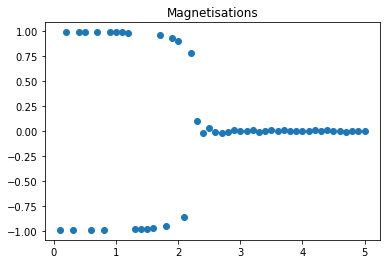

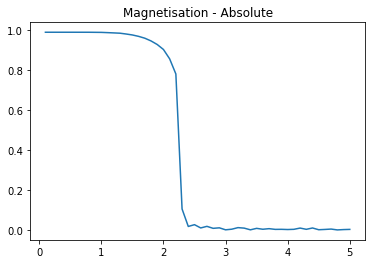

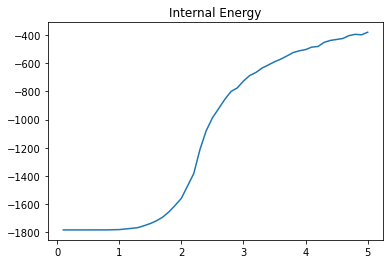

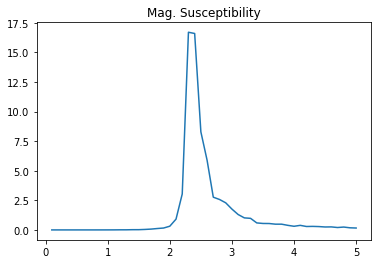

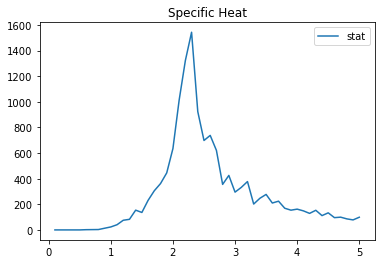

In [21]:
plot_stuff()

## Additional Plots

Comment 1 - 
One can expect the behaviour of the magnetisation plot. Interpret the energy vs temp. plot. 

1. Why constant below Tc?
2. Why jumping at Tc?
3. Why growing, albeit slowly, after Tc?

Comment 1.1 - 
Interesting obeservation - the statistical calculation is much smoother than the differentiation. However, remove the artefact

Comment 1.2 - The spikes that you see if you dont filter the data why are they appearing? - i think the solution is to use a larger equilibriation time for lower temperatures.

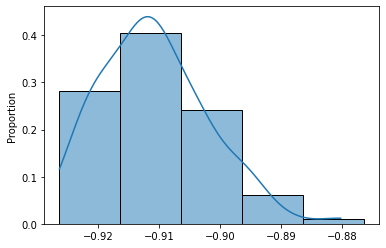

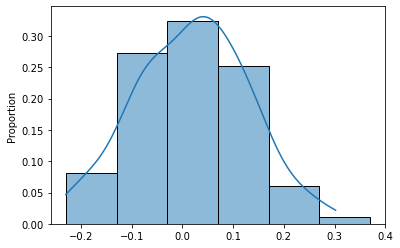

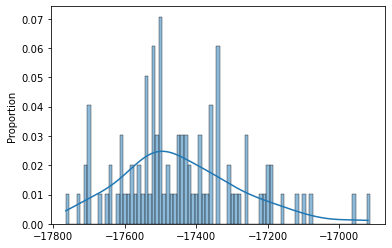

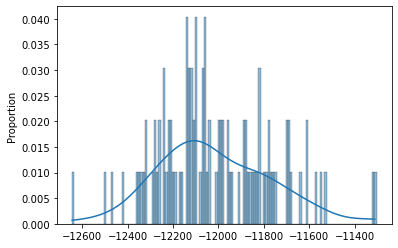

In [10]:
# Equiblibrium distribution of m v/s E in histogram above and below Tc

import seaborn as sb

sb.histplot(data=np.array(mag_below), stat='proportion', binwidth = 0.01, kde=True)
plt.show()
sb.histplot(data=np.array(mag_above), stat='proportion', binwidth = 0.1, kde=True)
plt.show()
sb.histplot(data=np.array(E_below), stat='proportion', binwidth = 10, kde=True)
plt.show()
sb.histplot(data=np.array(E_above), stat='proportion', binwidth = 10, kde=True)
plt.show()



Comment 2 - What is the importance of the mean and variance of these graphs. How do these change with N?

Interesting idea - calculating all important statistical properties - 
1. Entropy
2. Thermodynamic potentials

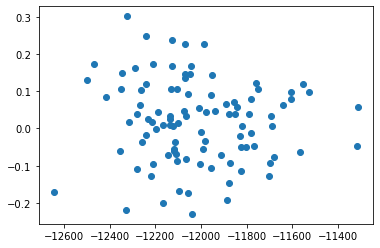

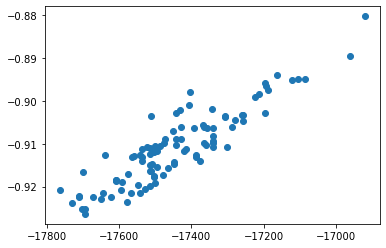

In [11]:
# Distributions of magnetisation and energy ##
plt.scatter(E_above,mag_above)
plt.show()
plt.scatter(E_below,mag_below)
plt.show()

## Correct the results below.

Calculating critical exponent Alpha

In [12]:
# Calculating alpha

samples = spec_heat[0:(Tc_index+1)]
temp_samples = temp[0:(Tc_index+1)]

m,c = np.polyfit(np.log(temp_samples),np.log(samples+1),deg=1)

print(m) # Should result in zero! - this is clearly wrong.

# this might be because our grid for discretising 
# temperature is too imprecise near the transition temperature to capture behaviour near it accurately
# Also another reason might be the finite size of our systems, which implies that the transitions 
# are not exactly transitions but crossovers. Thus, they are not sharp enough.
# One thing can be done - set a cutoff 

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
plt.plot(np.log(temp_samples),np.log(samples+1)) 
# As we can see, for an appreciable range of temperatures, the C is indeed constant

Calculating critical exponent beta


In [ ]:
samples = np.abs(np.array(mag[(Tc_index):(Tc_index+3)]))
temp_samples = np.array(temp[(Tc_index):(Tc_index+3)])

plt.plot(temp_samples,samples)
plt.show()
plt.plot(np.log((temp_samples-Tc)/Tc),np.log(samples+1))
plt.show()

In [ ]:
m,c = np.polyfit(np.log((temp_samples-Tc)/Tc),np.log(samples+1),deg=1)
print(m) # No where near correct value of 1/8 - why?

Calculating critical exponent gamma

Calculating two point functions